# DATASET: Titanic

This is the main computer lab for chapter 2, introducing basic concepts about statistics by exploring explanatory aspects of the "**titanic**" datasets.

## Keywords:
* **think, show, tell**
* **shape (modes, symmetry, outliers), center, spread**

### Analysis:
* frequency table;
* bar plot;
* pie plot;
* histogram;
* Kernel Density Estimation (KDE);
* mean and median;
* range, interquartile range;
* standard deviation;

### Tools:
* pandas;
* matplotlib;
* seaborn;
* statistics (built-in module);
* numpy;

### Suggested datasets for exercise
* "**tsunamis**";
* "**credit_card_charges**";


In [1]:
%pwd  # magic command

'C:\\Users\\sc522\\PROJECTS\\STAT\\IS5\\code\\ch02'

In [2]:
import pandas as pd
print(pd.__version__)

1.5.3


In [3]:
file_name = "../../dataset/ch02/titanic.txt"

In [4]:
titanic = pd.read_csv(file_name, sep='\t')  # load tab (\t) separated values from the data file

In [5]:
titanic.head()  # a few rows on the top, including header

,Name,Survived,Boarded,Class,MWC,Age,Adut_or_Chld,Sex,Paid,Ticket_No,Boat_or_Body,Job,Class_Dept,Class_Full
0,"ABBING, Mr Anthony",Dead,Southampton,3,Man,42.0,Adult,Male,7.55,5547,NaN,Blacksmith,3rd Class Passenger,3
1,"ABBOTT, Mr Ernest Owen",Dead,Southampton,Crew,Man,21.0,Adult,Male,NaN,NaN,NaN,Lounge Pantry Steward,Victualling Crew,V
2,"ABBOTT, Mr Eugene Joseph",Dead,Southampton,3,Child,14.0,Child,Male,20.25,CA2673,NaN,Scholar,3rd Class Passenger,3
3,"ABBOTT, Mr Rossmore Edward",Dead,Southampton,3,Man,16.0,Adult,Male,20.25,CA2673,[190],Jeweller,3rd Class Passenger,3
4,"ABBOTT, Mrs Rhoda Mary 'Rosa'",Alive,Southampton,3,Woman,39.0,Adult,Female,20.25,CA2673,A,NaN,3rd Class Passenger,3


In [6]:
print(f"Population size: {len(titanic)}")  # f-string and built-in len function for length (number of rows)

Population size: 2208


In [7]:
# simple (plain) indexing
titanic['Class']

0          3
1       Crew
2          3
3          3
4          3
        ... 
2203       3
2204    Crew
2205    Crew
2206       3
2207       3
Name: Class, Length: 2208, dtype: object

In [8]:
# equivalently
titanic.Class

0          3
1       Crew
2          3
3          3
4          3
        ... 
2203       3
2204    Crew
2205    Crew
2206       3
2207       3
Name: Class, Length: 2208, dtype: object

In [9]:
titanic["Class"].value_counts().sort_index()  # Frequency Table (absolute)

1       324
2       285
3       710
Crew    889
Name: Class, dtype: int64

In [10]:
titanic.Class.value_counts(normalize=True).sort_index()  # Frequency Table (relative)

1       0.146739
2       0.129076
3       0.321558
Crew    0.402627
Name: Class, dtype: float64

In [11]:
ticket_class = titanic.Class

In [12]:
print(ticket_class.dtype)

object


In [13]:
ticket_class = ticket_class.apply(str).astype('string')
print(ticket_class.dtype)

string


In [14]:
pd.crosstab(index=ticket_class, columns="count")  # pandas cross tabulation

col_0,count
Class,
1,324
2,285
3,710
Crew,889


In [15]:
titanic.groupby(['Class'])['Class'].count()  # group by the "Class" column, extract only that column, and then count

Class
1       324
2       285
3       710
Crew    889
Name: Class, dtype: int64

<Axes: >

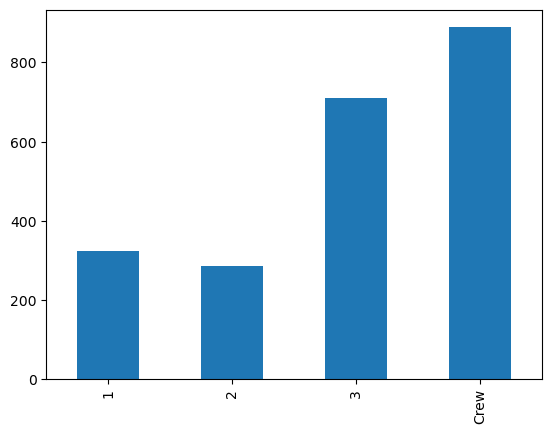

In [16]:
ticket_class.value_counts().sort_index().plot(kind='bar')  # pandas plot value_counts

<Axes: ylabel='Class'>

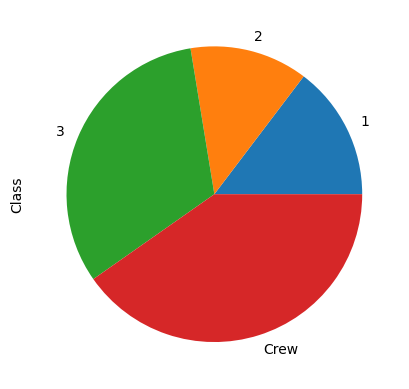

In [17]:
ticket_class.value_counts().sort_index().plot(kind='pie')  # pandas generate pie plot

In [18]:
import matplotlib as mpl
print(mpl.__version__)
import matplotlib.pyplot as plt

3.7.1


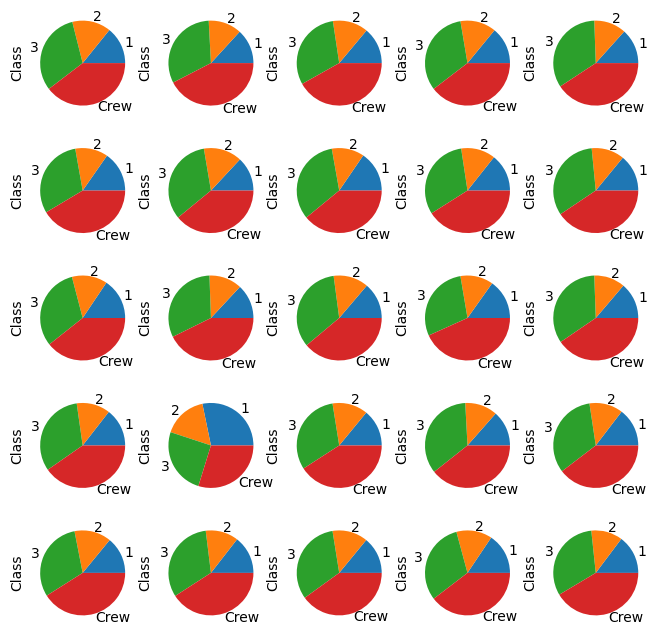

In [19]:
survivors = titanic.Survived[titanic.Survived == 'Alive'].count()  # number of survivors
fig, axes = plt.subplots(5, 5, figsize=(8, 8))  # a plot grid of 5x5
for r in range(5):
    for c in range(5):
        if (r, c) == (3, 1):
            # hide the real data
            titanic[titanic.Survived=='Alive']['Class'].value_counts().sort_index().plot(kind='pie', ax=axes[r, c])
        else:
            # simulated random sample
            ticket_class.sample(n=survivors).value_counts().sort_index().plot(kind='pie', ax=axes[r, c])

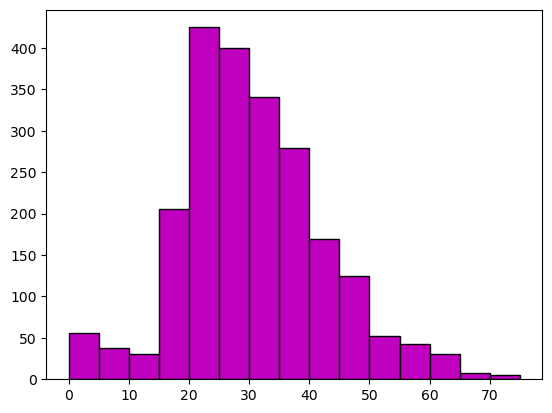

In [20]:
plt.hist(titanic['Age'], bins=range(0, 80, 5), color='m', edgecolor='k');  # pyplot histogram

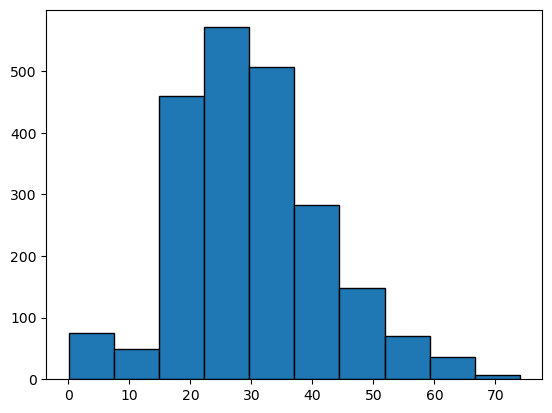

In [21]:
plt.hist(titanic['Age'], bins=10, edgecolor='k');

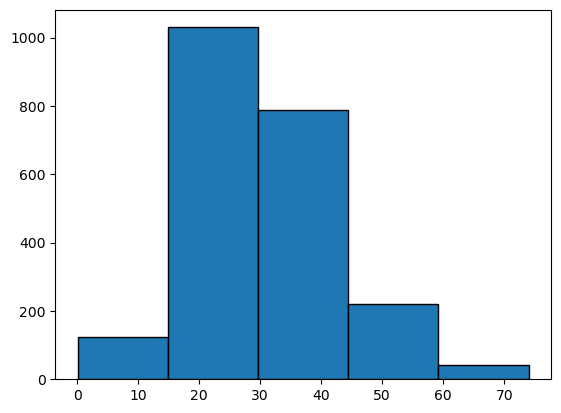

In [22]:
plt.hist(titanic['Age'], bins=5, edgecolor='k');

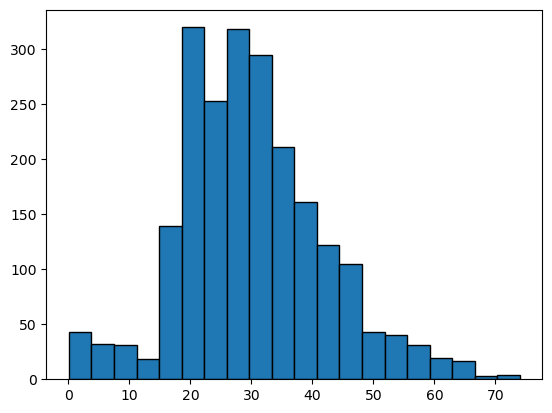

In [23]:
plt.hist(titanic['Age'], bins=20, edgecolor='k');

In [24]:
import seaborn as sns
print(sns.__version__)

0.12.2


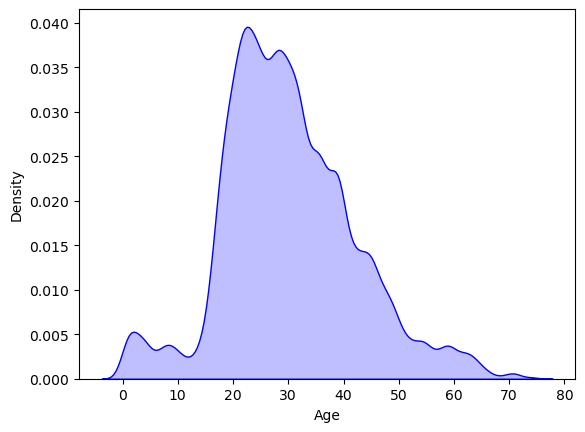

In [25]:
sns.kdeplot(titanic['Age'], fill=True, color='blue', bw_adjust=0.5);

In [26]:
import statistics as stat  # built-in module

In [27]:
stat.median(titanic[titanic.Class=='Crew']['Age'])

30.0

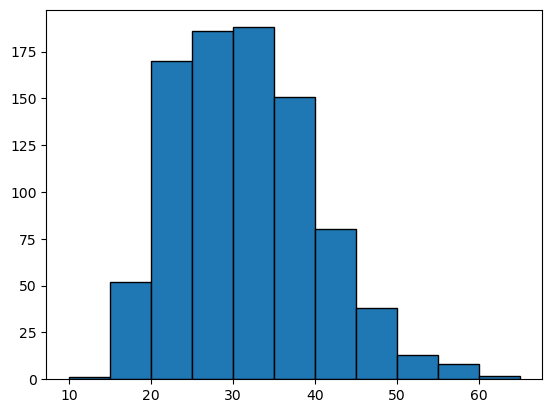

In [28]:
plt.hist(titanic[titanic.Class=='Crew']['Age'], bins=range(10, 70, 5), edgecolor='k');

In [29]:
stat.mean(titanic[titanic.Class=='Crew']['Age'])

31.124859392575928

In [30]:
avg_crew_age = stat.mean(titanic[titanic.Class=='Crew']['Age'])
print(f"Average age of crew members: {avg_crew_age:.1f}")

Average age of crew members: 31.1


In [31]:
crew_ages = titanic[titanic.Class=='Crew']['Age']

In [32]:
age_range = max(crew_ages) - min(crew_ages)  # min and max are built-in
print(f"oldest crew: {max(crew_ages)} years")
print(f"youngest crew: {min(crew_ages)} years")
print(f"range of crew ages: {age_range} years")

oldest crew: 62.0 years
youngest crew: 14.0 years
range of crew ages: 48.0 years


In [33]:
import numpy
print(numpy.__version__)

1.24.3


In [34]:
q75, q25 = numpy.percentile(crew_ages, [75, 25])
print(f"interquartile range of crew ages: {q75 - q25}")

interquartile range of crew ages: 13.0


In [35]:
sd_crew_ages = stat.stdev(crew_ages)
print(f"Standard Deviation of crew ages: {sd_crew_ages:.2f}")

Standard Deviation of crew ages: 8.55
